Loading the dataset: CIFAR-10

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential

from sklearn.metrics import confusion_matrix
import seaborn as sns


In [3]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step


Visualize the data

<Figure size 393.701x393.701 with 0 Axes>

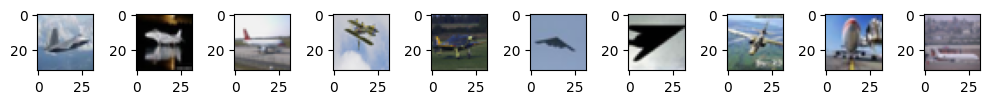

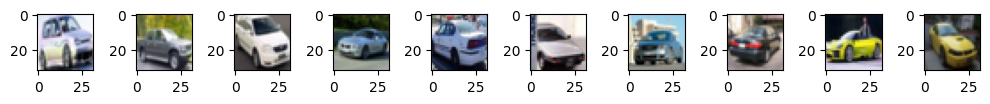

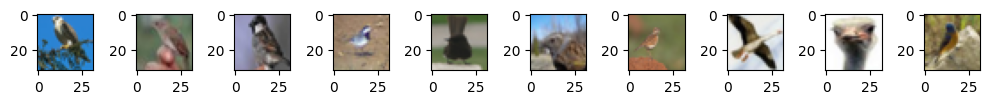

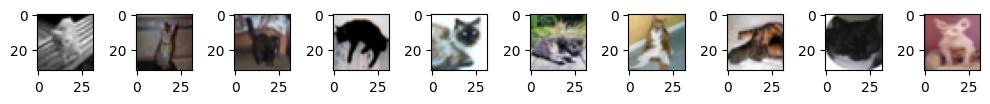

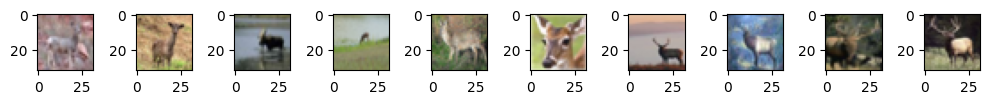

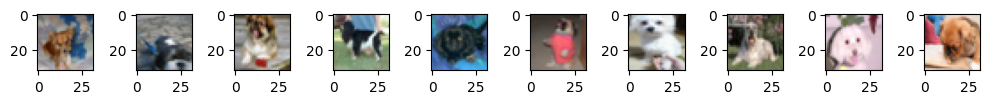

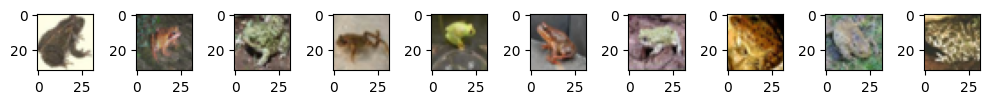

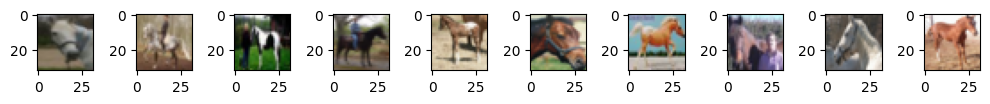

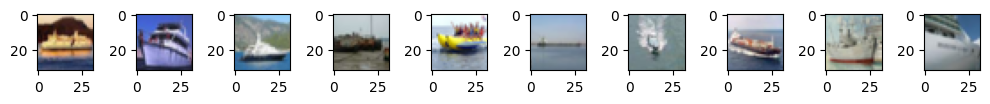

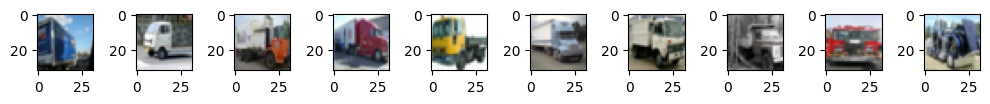

In [4]:

# print(x_train.shape)

num_classes = 10

fig = plt.figure(figsize=(10*1/2.54, 10*1/2.54))

for idx_class in range(num_classes):

  all_idx = np.where(y_train.flatten() == idx_class)[0]

  # random selection of 10 image of each category
  rand_idx = np.random.choice(all_idx, size=10, replace=False)
  selected = x_train[rand_idx]

  plt.figure(figsize=(10, 10))

  for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(selected[i])
    plt.tight_layout()

  plt.show()

Data normalization

In [5]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


Prepare the labels

In [6]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(y_train.shape)
print(y_test.shape)

(50000, 10)
(10000, 10)


Define the first model

In [7]:
input_shape = (32, 32, 3)

model1 = Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3,3), activation='relu'),

        layers.MaxPooling2D(pool_size=(2,2)),

        layers.Flatten(),

        layers.Dense(100, activation='relu'),
        layers.Dense(num_classes, activation="softmax")
    ]
)

model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       720,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model1.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

history = model1.fit(x_train, y_train, batch_size=512, epochs=50, validation_split=0.)



Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.1334 - loss: 2.2745 - val_accuracy: 0.2354 - val_loss: 2.1843
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2549 - loss: 2.1455 - val_accuracy: 0.2694 - val_loss: 2.0588
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2930 - loss: 2.0267 - val_accuracy: 0.3164 - val_loss: 1.9733
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3173 - loss: 1.9535 - val_accuracy: 0.3136 - val_loss: 1.9386
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3418 - loss: 1.8963 - val_accuracy: 0.3376 - val_loss: 1.8883
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3489 - loss: 1.8735 - val_accuracy: 0.3562 - val_loss: 1.8517
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3613 - loss: 1.8394 - val_accuracy: 0.3534 - val_loss: 1.8414
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3715 - loss: 1.8134 - val_accuracy: 0.3692 - v

Test loss: 1.2583043575286865
Test accuracy: 0.5577999949455261
Validation accuracy: 1.2583043575286865
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


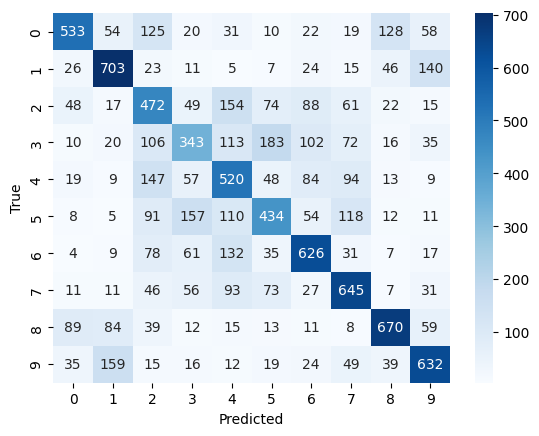

In [17]:
score = model1.evaluate(x_test, y_test, verbose=0)

print("Test loss:", score[0])
print("Test accuracy:", score[1])
print("Validation accuracy:", score[0])

y_test_pred_prob = model1.predict(x_test)
y_test_pred = y_test_pred_prob.argmax(axis=1)

conf_matr = confusion_matrix(np.argmax(y_test, axis=1), y_test_pred)

sns.heatmap(conf_matr, annot=True, fmt='d', cmap='Blues')

plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [18]:
print(history.history.keys())
score = model1.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Test loss: 1.2583043575286865
Test accuracy: 0.5577999949455261


In [22]:
import os
print("Working directory:", os.getcwd())
print("Files here:", os.listdir())


# Save full model (best default)
model1.save("cifar10.v1_G1_cnn.keras")


Working directory: /content
Files here: ['.config', 'cifar10.v1_G1_cnn.keras', 'sample_data']
